In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

# [1월 26일]
---

## # 이산형 확률분포

### # 1차원 이산형 확률분포

In [117]:
x_set = np.array([1, 2, 3, 4, 5, 6])

def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0
X = [x_set, f]

In [118]:
prob = np.array([f(i) for i in x_set])
print(prob, '\n')
dict(zip(x_set, prob)) # (확률변수, 확률)

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

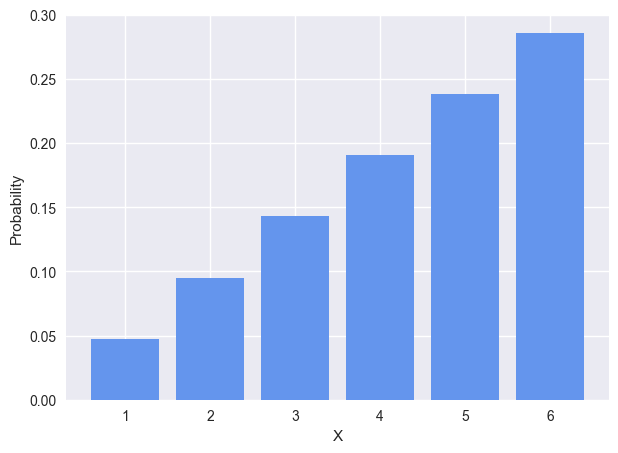

In [119]:
plt.style.use('seaborn')
plt.figure(figsize=(7,5))
plt.bar(x_set, prob, color = 'cornflowerblue')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()
plt.close()

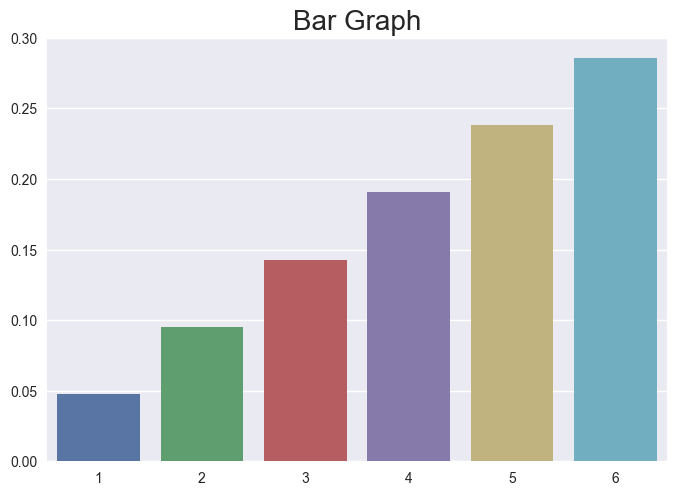

In [94]:
plt.style.use('seaborn')
sns.barplot(x_set, prob)
plt.title('Bar Graph', fontsize = 20)
plt.show()
plt.close()

In [95]:
print(np.all(prob >= 0))
print(np.sum(prob))

True
0.9999999999999999


#### # 누적분포함수

In [96]:
def F(x):
    return np.sum([f(i) for i in x_set if i <= x])

F(20)

0.9999999999999999

#### # 확률변수의 변환 : 확률변수 X에 2를 곱하고 3을 더한 2X + 3도 확률변수가 된다

In [97]:
# def f(a) : 확률변수의 확률

y_set = np.array([i * 2 + 3 for i in x_set])
prob = np.array([f(i) for i in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

#### # 1차원 이산형 확률변수의 지표
#### # 평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며 기대값이라고도 부른다.

In [98]:
np.sum([i * f(i) for i in x_set])

4.333333333333333

#### # 확률변수의 기대값은 확률변수를 무제한 시행하여 얻은 실현값의 평균

In [99]:
sample = np.random.choice(x_set, int(1e6), p = prob) # 10만번 실행
np.mean(sample)

4.332539

#### # 기대값 일반화

In [100]:
def E(X, g = lambda x: x):
    x_set, f = X
    return np.sum([g(i) * f(i) for i in x_set])

In [101]:
E(X)

4.333333333333333

In [102]:
E(X, g = lambda x: x * 2 + 3)

11.666666666666664

#### # 기대값의 선형성

In [103]:
E(X) * 2 + 3

11.666666666666666

#### # 분산

In [104]:
mean = E(X)
np.sum([(i - mean)**2 * f(i) for i in x_set])

2.2222222222222223

#### # 분산의 일반화

In [105]:
def V(X, g = lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(i) - mean)**2 * f(i) for i in x_set])
V(X)

2.2222222222222223

In [106]:
print(V(X, lambda x: 2 * x + 3))
2**2 * V(X)

8.88888888888889


8.88888888888889

### # 2차원 이산형 확률분포

In [107]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [108]:
def f_XY(x, y):
    if (1 <= y <= 6) and (1 <= x - y <= 6):
        return y * (x - y) / 441
    else:
        return 0

In [109]:
XY = [x_set, y_set, f_XY]
XY

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([1, 2, 3, 4, 5, 6]),
 <function __main__.f_XY(x, y)>]

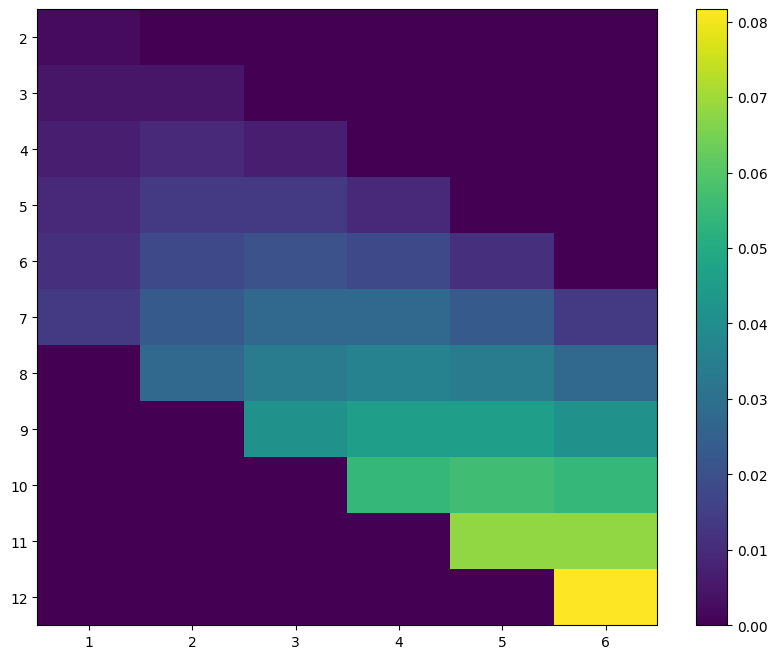

In [110]:
# prob = np.array([f_XY(x_i, y_j) for x_i, y_j in x_set, y_set])
prob = np.array([[f_XY(i, j) for j in y_set] for i in x_set])
plt.style.use('default')
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor = False)
ax.set_xticklabels(np.arange(1, 7), minor = False)
ax.set_yticklabels(np.arange(2, 13), minor = False)

# y 축을 내림차순으로 바꾸기

ax.invert_yaxis()
fig.colorbar(c, ax = ax)

In [120]:
np.all(prob >= 0)

True

In [121]:
np.sum(prob)

0.9999999999999999

#### # 주변확률분포 : 확률변수 (X, Y)는 결합확률분포에 의해 동시에 정의되지만 개별 확률변수에만 흥미가 있을 수 있다.
 - 확률변수 X만의 움직임, 즉, 확률변수 X의 확률함수를 알고 싶은 상황.

In [122]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

X = [x_set, f_X]
Y = [y_set, f_Y]

X, Y

([array([1, 2, 3, 4, 5, 6]), <function __main__.f_X(x)>],
 [array([1, 2, 3, 4, 5, 6]), <function __main__.f_Y(y)>])

Text(0, 0.5, 'probability')

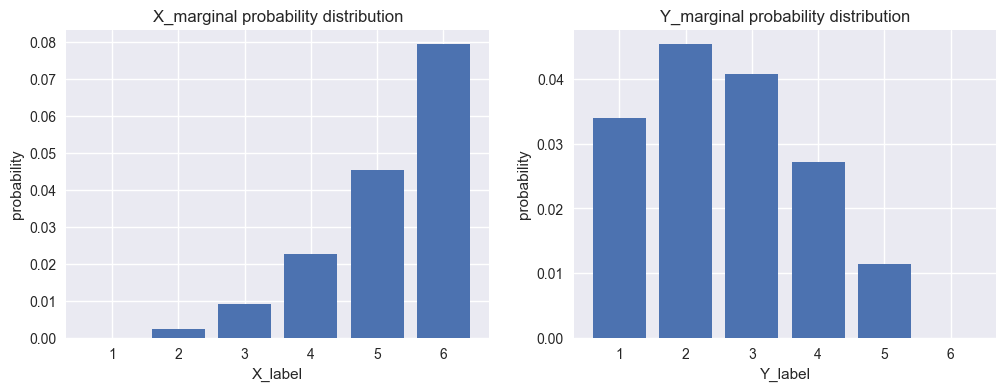

In [123]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize = (12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_label')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_label')
ax2.set_ylabel('probability')

#### # 기대값 - 2차원 이산형 확률분포의 지표

In [124]:
np.sum([[i * f_XY(i, j) for i in x_set] for j in y_set])

0.8253968253968254

In [125]:
sum = 0
for j in y_set:
    for i in x_set:
        sum += i * f_XY(i, j)
sum

0.8253968253968254

In [126]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(i, j) * f_XY(i, j) for i in x_set for j in y_set])

mean_X = E(XY, lambda x, y: x)
print(mean_X)
mean_Y = E(XY, lambda x, y: y)
print(mean_Y)

8.666666666666666
4.333333333333333


#### # 기대값의 선형성

In [127]:
a, b = 2, 3

E(XY, lambda x, y: a * x + b * y)

30.333333333333332

#### # 분산
- X의 분산이라면 X에 관한 편차 제곱의 기대값으로 구할 수 있다.

In [128]:
np.sum([(i - mean_X)**2 * f_XY(i, j) for i in x_set for j in y_set])

2.0599647266313927

#### # 분산의 일반화

In [129]:
def V(XY, g):
    x_set,y_set, f_XY = XY
    mean = E(XY , g)
    return np.sum([(g(i, j) - mean)**2 * f_XY(i, j) for i in x_set for j in y_set])

V(XY, lambda x, y: x)

4.444444444444444

In [130]:
var_X = V(XY, lambda x, y: x)
var_Y = V(XY, lambda x, y: y)

var_X, var_Y

(4.444444444444444, 2.2222222222222223)

#### # 공분산

In [131]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(i - mean_X) * (j - mean_Y) * f_XY(i, j) for i in x_set for j in y_set])

In [132]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [133]:
V(XY, lambda x, y: a * x + b * y)

64.44444444444444

#### # 분산과 공분산의 공식

In [134]:
a**2 * var_X + b**2 * var_Y + 2 * a * b * cov_xy

64.44444444444443

#### # 확률변수의 상관계수
- 공분산을 각각의 표준편차로 나누어 산출

In [135]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474

### # 대표적인 이산형 확률분포

pmf : 확률질량함수(probability mass function)

pdf : 확률밀도함수(probability density function)

cdf : 누적분포함수(cumulative distribution function)

ppf : 누적분포함수의 역함수(inverse cumulative distribution function)

sf : 생존함수(survival function) = 1 - 누적분포함수

isf : 생존함수의 역함수(inverse survival function)

rvs : 랜덤 표본 생성(random variable sampling)

fit : 모수 추정 (parameter estimation)

#### # 그래프를 위한 사용자 함수

In [136]:
from scipy import stats

linestyles = ['-', '--', ':']

def E(x, g = lambda x: x):
    x_set, f = X
    return np.sum([g(i) * f(i) for i in x_set])

def V(X, g = lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(i) - mean)**2 * f(i) for i in x_set])

def check_prob(X): # 확률분포를 인수로 가지면 기대값과 분산계산 결과를 반환
    x_set, f = X
    prob = np.array([f(i) for i in x_set])
    assert np.all(prob >= 0), 'minus probability' # assult : 
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X) : .4f}')
    print(f'variance {(V(X)) : .4f}')
    
def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기대값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(i) for i in x_set])
    fig = plt.figure(figsize = (6, 4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label = 'prob')
    ax.vlines(E(X), 0, b, label = 'mean', color = 'gold')
    ax.set_ylim(0, prob.max() * 1.2)
    ax.legend()

#### # 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률 변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공, 0이 나오면 실패라고 함
- 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률
- stats.bernoulli(p) : 베르누이 분포 함수 / p = 성공확률

In [137]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p**x * (1 - p)**(1 - x)
        else:
            return 0
    return x_set, f

In [138]:
p = 0.3
X = Bern(p)

In [139]:
check_prob(X)

expected value  0.3000
variance  0.2100


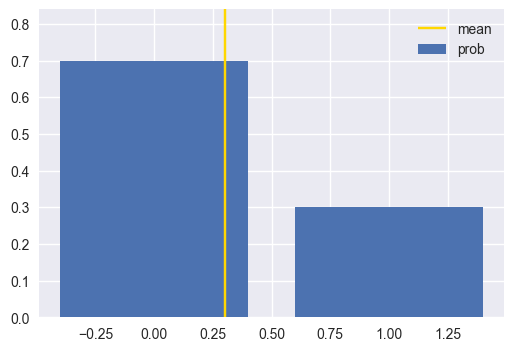

In [146]:
plot_prob(X)

In [141]:
rv = stats.bernoulli(p)

In [142]:
rv.pmf(0), rv.pmf(1)

(0.7, 0.3)

In [143]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [144]:
rv.cdf([0, 1])

array([0.7, 1. ])

In [47]:
rv.mean(), rv.var()

(0.3, 0.21)

#### # 이항분포
- 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포
- f(x) = $_{n}C_{x}p^{x}(1 - p)^{n - x}$ $(x \in \{0, 1, 2, 3...\})$
- stats.binom(n, p) : 이항분포함수 / n = 시행횟수, p = 성공확률

In [48]:
from scipy.special import comb # comb(x, y) = x번 중 y실행

def Bin(n, p):
    x_set = np.arange(n + 1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1 - p)**(n - x)
        else:
            return 0
    return x_set, f

#### # 기하분포
- 베르누이 시행에서 처음 성공할 때까지 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기
- f(x) = $(1 - p)^{x - 1}p$ $(x \in \{1, 2, 3...\})$
- 기하분포의 기대값과 분산 : $E(X) = 1/p$, $V(X) = (1 - p)/p^{2}$
- stats.geom(p) : 기하분포의 함수 / p = 성공 확률

In [3]:
# 사용자 함수 (단, 확를변수를 1 이상 29 이하인 정수으로 설정)

def Ge(p):
    x_set=np.arange(1,30)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1) * p
        else:
            return 0
    return x_set, f

#### # 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 Poi(2)를 따른다.
 - 예) 하루에 교통사고가 한 건도 일어나지 않을 확률 : $P(X = 0) = 2!/0! * e^{-2} = 0.135$
- $f(x) = \lambda^x/x!*e^{-\lambda}$ $(x \in\{0, 1, 2, 3, ...\})$
- stats.poisson(lam) : 포아송 분포의 함수 / lam = 단위시간 동안 발생하는 사건의 평균

In [6]:
# 사용자 함수 (단, 확를변수를 1 이상 19 이하인 정수로 설정)

from scipy.special import factorial

def Poi(lam):
    x_set=np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x) / factorial(x) *np.exp(-lam)
        else:
            return 0
    return x_set , f

# [1월 27일]
---

## # 연속형 확률변수
---
- 이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다.
- 연속형 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 Scipy의 integral 모듈을 사용하여 구현한다.
- 연속형 확률변수에서는 확률의 성질이 수식을 만족해야 함
 - f(x)는 확률함수이므로 (확률은) 무조건 0이상 값을 가진다.
 - f(x)에 대하여 무한대 범위의 적분 결과는 1

### # 확률함수
---

In [49]:
x_range = np.array([0, 1])

def f(x):
    if x_range[0] <= x <= x_range[1]:
        return x * 2
    else:
        return 0

X = [x_range, f]

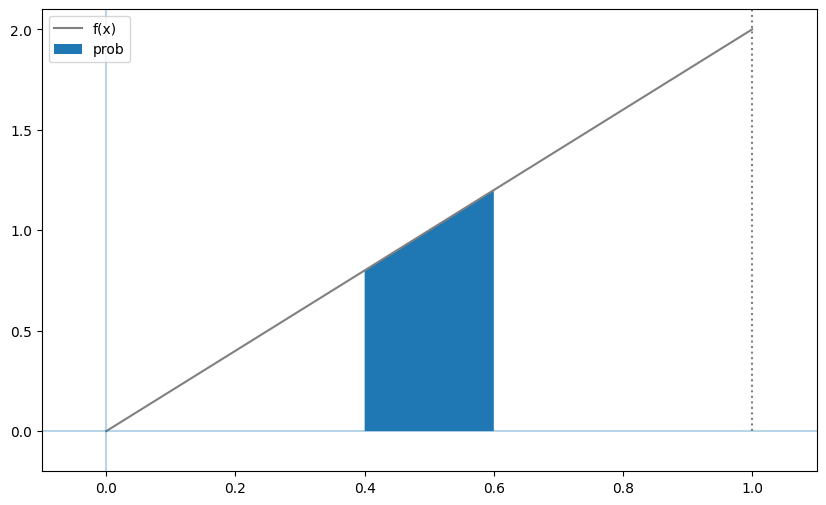

In [50]:
xs = np.linspace(x_range[0], x_range[1], 100)
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label = 'f(x)', color = 'gray')
ax.hlines(0, -0.2, 1.2, alpha = 0.3)
ax.vlines(0, -0.2, 2.2, alpha = 0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles = ':', color = 'gray')

# 0.4 ~ 0.6 x좌표를 생성

xs = np.linspace(0.4, 0.6, 100)
ax.fill_between(xs, [f(x) for x in xs], label = 'prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.2))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

### # 적분
---

In [51]:
# 첫번째 인수는 피적분함수, 두번재 인수와 세번째 인수는 적분 범위
# quad 함수는 적분값과 추정오차를 반환

integrate.quad(f, 0.4, 0.6)

(0.19999999999999996, 2.2204460492503127e-15)

In [52]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.fun # 함수의 최소값은 fun이라는 인스턴스 변수로 구함

0

In [53]:
# 무한대 범위의 적분의 결과

integrate.quad(f, -np.inf, np.inf) # (피적분함수, 음의방향으로 무한대, 양의방향으로 무한대)

(1.0, 2.5284034865791227e-09)

## # 연속형 확률분포
---
- 특정값이 될 확률은 0, 특정 값이 범위에 들어갈 확률은 확률밀도함수를 적분하여 계산(적분은 곡선 아래 면적의 크기)
- 정규분포는 연속확률분포로 가장 자주 쓰이는 확률분포. 모양은 평균을 중심으로 하나의 봉우리 형태를 띄며 한 집단의 많은 사람들의 키, 몸무게, 시험성적 등의 데이터에 잘 나타나는 분포
 - 누적분포함수 : 확률분포에서 얻은 확률변수 3 이하가 되는 확률.  - Cumulative density function -
   - stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
 - 정규분포의 확률밀도 계산
   - 확률변수 3일 때의 확률밀도 N(3|4, 0.8**2)
   - stats.norm.pdf(loc = 4, scale = 0.8, x = 3) - Probability density function -
 - 하측확률 : '확률변수 x가 N보다 낮을 확률은 M퍼센트이다'에서 N을 고정하고 M을 구하는 경우
   - 이때의 M이 하측확률이며 M(확률)을 고정하고 N(변수)를 구하는 경우 이때의 N이 퍼센트포인트 하측확률이 2.5%가 되는 퍼센트 포인트
 - stats.norm.pdf(x = x)로 하여 loc(평균)과 scale(표준편차)를 지정하지 않을 경우 표준정규분포가 됨. - Probability density function -
 - stat.norm.rvs()함수는 정규확률분포로부터 난수를 생성

pmf : 확률질량함수(probability mass function)

pdf : 확률밀도함수(probability density function)

cdf : 누적분포함수(cumulative distribution function)

ppf : 누적분포함수의 역함수(inverse cumulative distribution function)

sf : 생존함수(survival function) = 1 - 누적분포함수

isf : 생존함수의 역함수(inverse survival function)

rvs : 랜덤 표본 생성(random variable sampling)

fit : 모수 추정 (parameter estimation)

### # 표준정규분포
---

Text(0.5, 1.0, '누적분포함수')

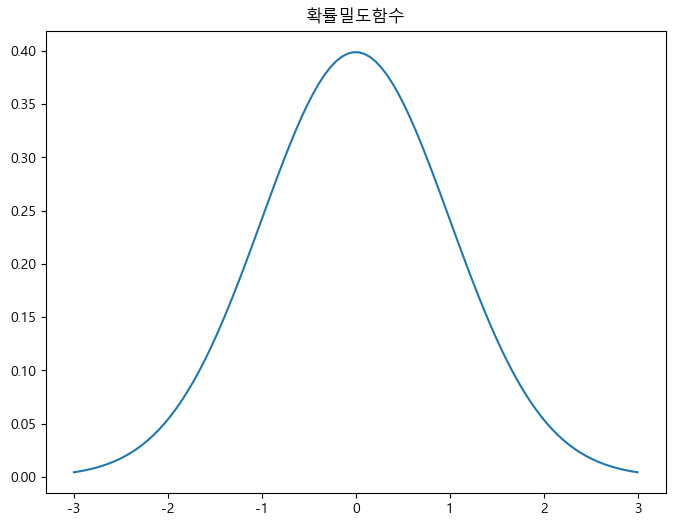

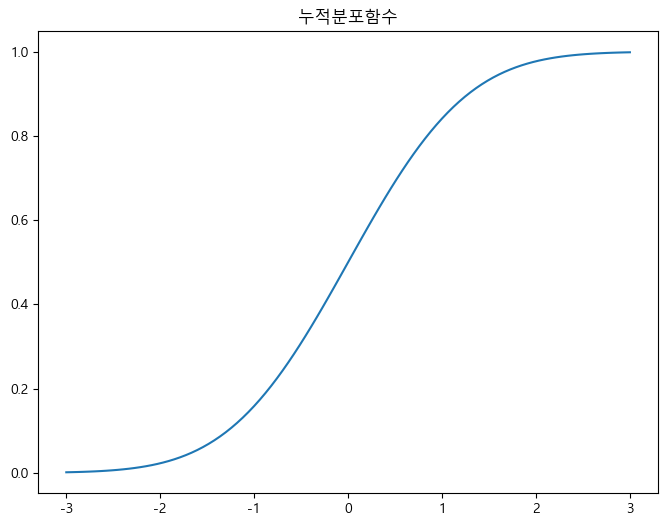

In [54]:
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

rv = stats.norm(loc = 0, scale = 1)
xx = np.linspace(-3, 3, 100)
pdf = rv.pdf(xx) # 확률밀도함수

plt.figure(figsize = (8, 6))
plt.plot(xx, pdf)
plt.title('확률밀도함수')


cdf = rv.cdf(xx) # 확률밀도함수

plt.figure(figsize = (8, 6))
plt.plot(xx, cdf)
plt.title('누적분포함수')

### # 정규분포의 확률밀도 계산
---

#### # 확률변수 x의 확률밀도
---

In [55]:
# 확률변수 3일때의 확률밀도 (N 3|4.0, 0.8**2)
# np.pi : 원주율 (원주율의 상수로 사용)
# exp() 함수 : 자연상수 e를 밑으로 가지는 계산에 사용

x = 3
mu = 4
sigma = 0.8

1 / (np.sqrt(2 * np.pi * sigma**2)) * sp.exp(-((x - mu)**2) / (2 * sigma**2))

0.22831135673627742

In [56]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.2283113567362774

In [57]:
# 표준정규분포에서 확률변수가 1일때의 확률밀도를 구하세요.

stats.norm.pdf(loc = 0, scale = 1, x = 1)

0.24197072451914337

In [58]:
# 정규분포 인스턴스 생성

norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

0.2283113567362774

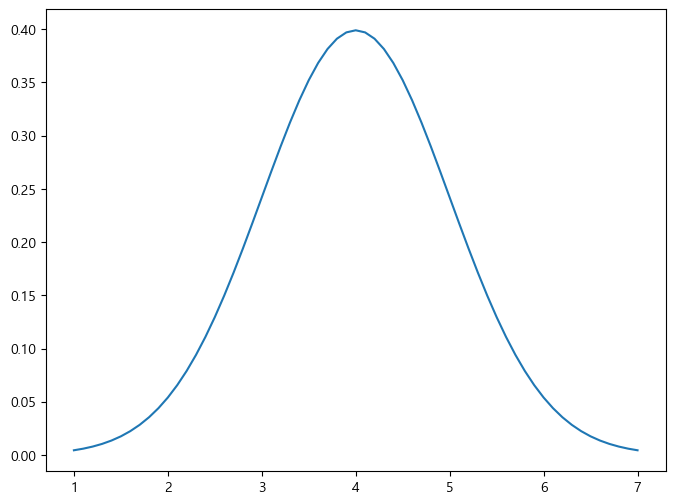

In [59]:
x_plot = np.arange(1, 7.1, 0.1)

mean = x_plot.mean()
std = x_plot.std()

pdf = stats.norm(mean, 1).pdf(x_plot)

plt.figure(figsize = (8, 6))
plt.plot(x_plot, pdf)

In [60]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc = 4, scale = 0.8, size = 100000)
simulated_sample[:10]

display(pd.DataFrame(simulated_sample).describe().round(3))

simulated_sample.sort()
a = simulated_sample

len(a[a <= 3]) / len(a)

,0
count,100000.000
mean,4.004
std,0.799
min,0.538
25%,3.466
50%,4.005
75%,4.540
max,7.334


0.10371

0.1056336863503608

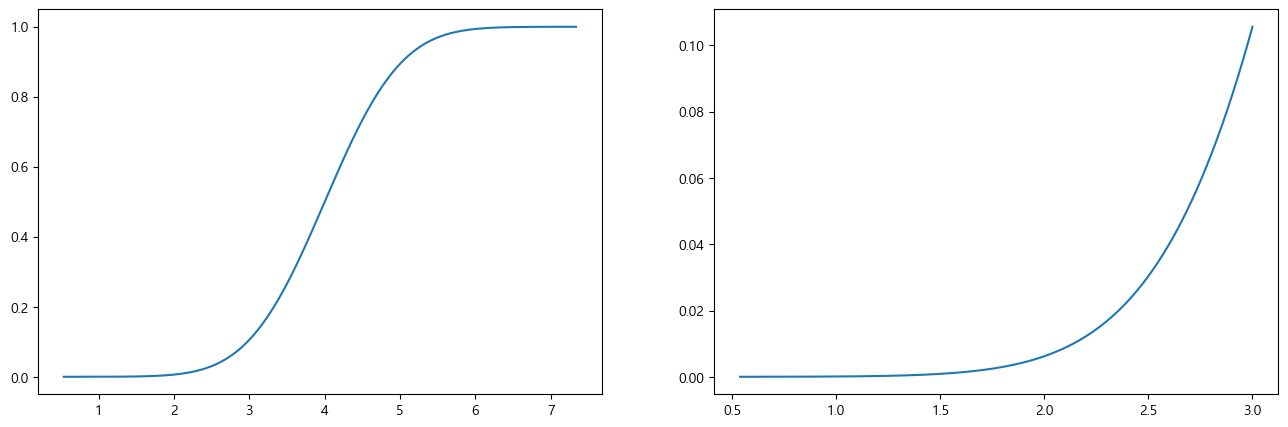

In [61]:
# 표본이 특정 값 이하가 되는 확률

a = stats.norm(4, 0.8).cdf(simulated_sample)
b = stats.norm(4, 0.8).cdf(simulated_sample[simulated_sample <= 3])

fig = plt.figure(figsize = (16, 5))
ax1 = fig.add_subplot(121)
ax1.plot(simulated_sample, a)

ax2 = fig.add_subplot(122)
plt.plot(simulated_sample[simulated_sample <= 3], b)

b[-1]

#### # 누적분포함수
---

In [62]:
# 확률분포에서 얻은 확률변수 3 이하가 되는 확률(loc = 4, scale = 0.8)

stats.norm(4, 0.8).cdf(3)

0.10564977366685535

In [63]:
# 정규분포는 평균에 대해 좌우대칭
# 데이터가 평균값 이하가 될 확률은? 50%

stats.norm(4, 0.8).cdf(4)

0.5

#### # q : 하측확률 -> 퍼센트포인트
---

In [64]:
stats.norm(4, 0.8).ppf(q = 0.025)

2.4320288123679563

#### # x : 퍼센트포인트 -> 하측확률
---

In [65]:
stats.norm(4, 0.8).cdf(x = 2.4320288123679563)

0.024999999999999977

## # 대표적인 연속형 확률분포
---

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

linestyles = ['-', '--', '-.']

# 평균
def E(X, g = lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

# 분산
def V(X, g = lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean)**2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

# 확률분포를 인수로 가지면 기대값과 분산계산 결과를 반환
def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f,-np.inf,np.inf)[0],6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected value {E(X):.3f}')
    print(f'variance{V(X):.3f}')
    
# 확률분포를 인수로 가지면 기대값과 분산계산 결과를 그래프로 반환    
def plot_prob(X, x_min, x_max): 
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
    
    fig = plt.figure(figsize = (10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs], label = 'f(x)', color = 'red')
    ax.plot(xs, [F(x) for x in xs], label = 'F(x)', ls = '--', color = 'crimson')
    ax.legend()

### # 정규분포
---
- 통계분석에서 자주 사용하는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현한다. 가우스 분포라고도 부른다.
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 평균과 분산 두가지이다.
- stats.norm(loc, scale) : 정규분포함수 / loc = 평균(분포의 기대값) , scale = 표준편차

In [67]:
# 정규분포 사용자 정의 함수
 
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / (np.sqrt(2 * np.pi * sigma ** 2)) * sp.exp(-((x-mu)**2) / (2 * sigma ** 2))
    return x_range, f

In [68]:
# (mu, sigma)  - (평균, 분산)일 경우의 함수

# def N(mu, sigma):
#     x_range = [-np.inf, np.inf]
#     def f(x):
#         return 1 / (np.sqrt(2 * np.pi * sigma)) * sp.exp(-((x-mu)**2) / (2 * sigma))
#     return x_range, f

In [69]:
mu, sigma = 2, 0.5 # (평균, 표준편차)

X = N(mu, sigma)
check_prob(X)

expected value 2.000
variance0.250


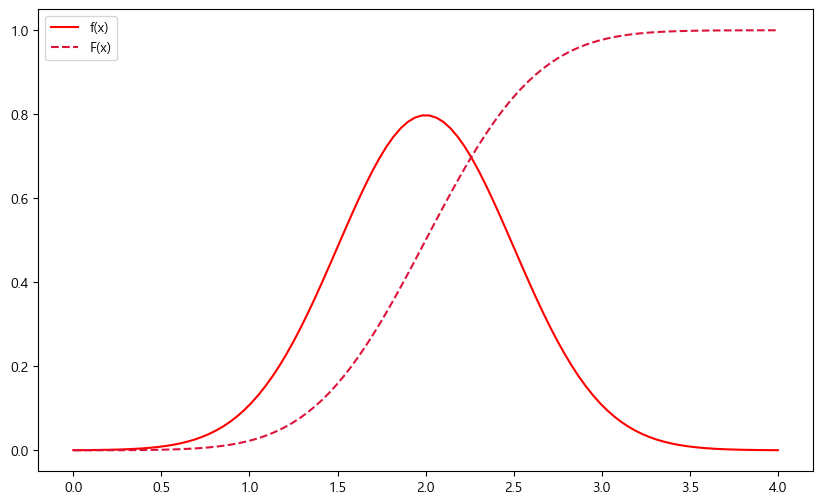

In [70]:
plot_prob(X, 0, 4)

In [71]:
rv = stats.norm(2, 0.5)
print(rv.mean(), rv.var())

2.0 0.25


In [72]:
# pp가 2일때 확률밀도

rv.pdf(2)

0.7978845608028654

In [73]:
# pp가 2일때 하측확률

rv.cdf(2)

0.5

In [74]:
# 상위 30프로

rv.isf(0.3), rv.isf(0.7)

(2.2622002563540207, 1.7377997436459798)

In [75]:
# 90% 구간 범위

rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [1]:
# 하위 5%, 상위 5%의 확률변수

rv.isf(0.95), rv.isf(0.05) # rv.ppf(0.05), rv.ppf(0.95) 와 같다.

NameError: name 'rv' is not defined

### # 지수분포
---
- 어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0 이상의 실수
- 지수분포의 파라미터는 $\lambda$로 양의 실수이며 Ex($\lambda$)로 표기한다.
- Ex($\lambda$)는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격에 따르는 확률분포이다.
- 어떤 사건의 발생횟수가 포아송 분포를 따르면, 사건 사이의 대기 시간은 지수 분포를 따른다.
- stats.expon(loc, scale) : 지수분포함수 / loc = 단위 시간의 시작 위치 (default 값은 0), scale = 1/lam (기대값)

In [1]:
# 사용자 정의 함수

def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x) # 자연상수 e는 numpy 것을 주로 사용
        else:
            return 0
    return x_range, f

In [78]:
lam = 3
X = Ex(lam)
check_prob(X)

expected value 0.333
variance0.111


In [2]:
plot_prob(X, 0, 2)

NameError: name 'plot_prob' is not defined

# [1월 28일]
---

### # 카이제곱분포
---
- Z_1, Z_2, ..., Z_n이 서로 독립이고 표준정규분포 N(0, 1)을 따르고 있을때 그 제곱합의 확률분포를 자유도가 n인 카이제곱분포라고 한다.
- 카이제곱분포는 분산의 구간 추정이나 독립성 검정에서 사용하는 확률분포이다.
- 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어진다.
- 자유도가 커지면 좌우대칭에 가까워진다.
- 자유도의 값 가까이에 분포의 정점이 있다.
- stats.chi2(n) : 카이제곱분포함수 / n = 자유도

- https://www.jmp.com/ko_kr/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html

In [2]:
# 표본크기 10, 백만번 무작위 추출

n = 10
rv = stats.norm()
sample_size = int(1e6)
z_sample = rv.rvs((n, sample_size))
z_sample.shape
chi2_sample = np.sum(z_sample**2, axis = 0)

Text(0.5, 1.0, '히스토그램 vs 확률밀도함수')

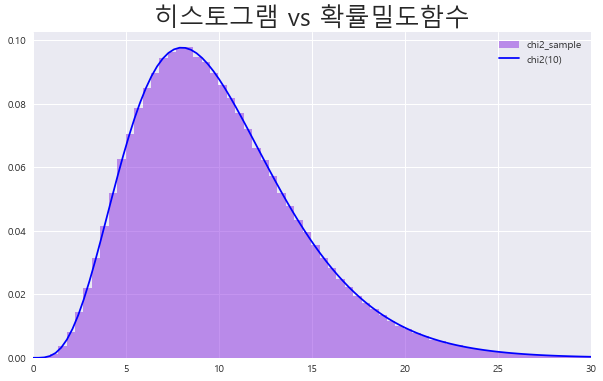

In [3]:
# 표본데이터의 히스토그램과 확률밀도함수

plt.figure(figsize=(10,6))
rv_true = stats.chi2(n) # 카이제곱분포의 함수
xs = np.linspace(0,30,100)
plt.hist(chi2_sample,bins=100,density=True,alpha=0.5,label='chi2_sample',color='blueviolet')
plt.plot(xs,rv_true.pdf(xs),label=f'chi2({n})',color='b')
plt.xlim(0,30)
plt.legend()
plt.title('히스토그램 vs 확률밀도함수',fontsize=25)

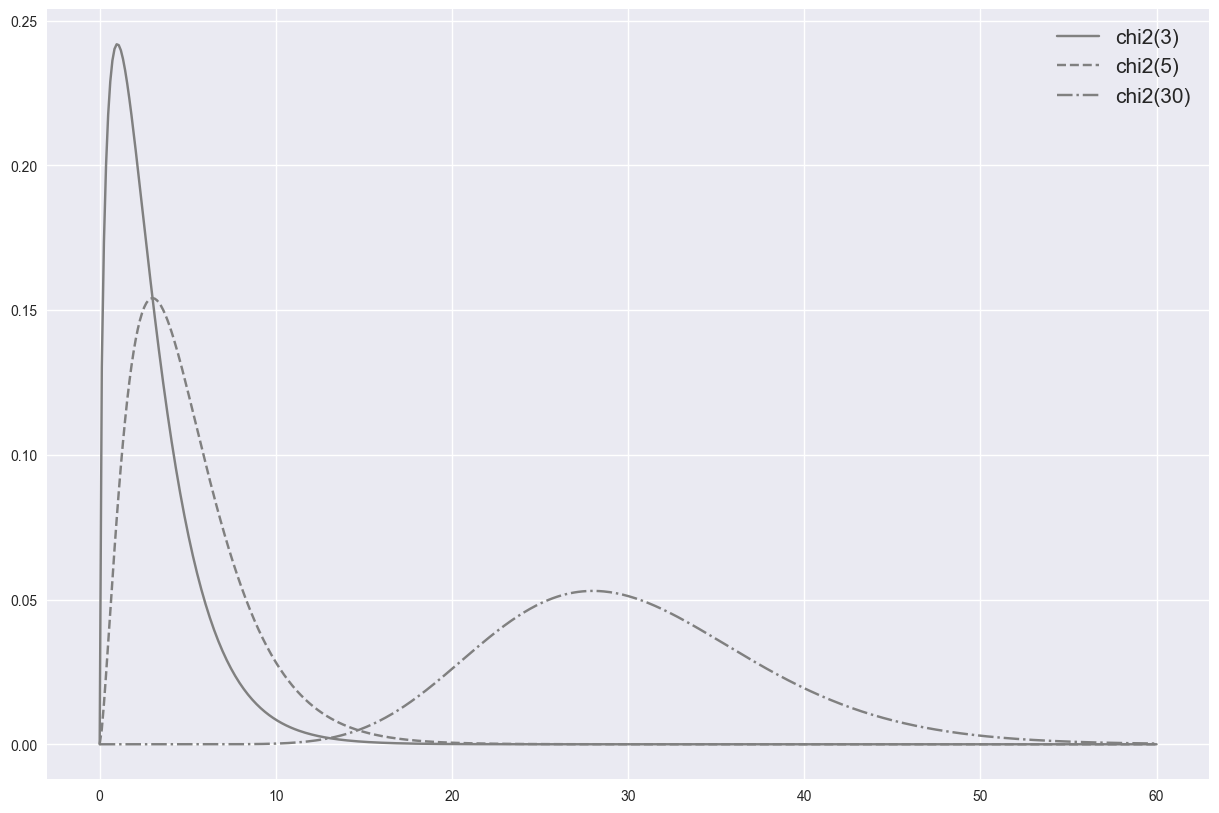

In [149]:
# 자유도 변화에 따른 카이제곱분포 : 자유도를 3, 5, 10으로 변환

plt.figure(figsize = (15 ,10))
xs = np.linspace(0, 60, 500)
linestyles = ['-', '--', '-.']
for n, ls in zip([3, 5, 30], linestyles):
    rv = stats.chi2(n)
    plt.plot(xs, rv.pdf(xs), label = f'chi2({n})', ls = ls, color = 'gray')

plt.legend(fontsize = 15)

In [150]:
# 자유도 n = 5, 상위 5%

rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355

### # t 분포
---
- 정규분포에서 모평균의 구간추정 등에 사용하는 확률분포
- 확률변수 Z, Y는 서로 독립이고 Z는 표준정규분포 N(0, 1)을 Y는 자유도가 n인 카이제곱분포 $x^2(2)$를 따를 때 t = ${Z}\over{\sqrt{{Y}\over{n}}}$의 확률분포를 자유도가 n인 t분포라고 한다.
- t분포의 의미
 - 모분산을 모르는 상황에서도 표본평균의 분포에 대하여 말할 수 있다.
 - t분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화한다.
 - 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있다.
- t분포의 특성
 - t분포는 모집단이 정규분포라도 분산($\sigma^2$)이 알려져 있지 않고 표본의 수가 적은 경우에 평균($\mu$)에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰이는 분포이다.
 - t분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.
 - t분포의 고리는 표준정규분포보다 두껍다. (fat tail)
 - t분포는 자유도 n에 따라 모습이 변하는데 자유도 n이 커집에 따라 표준정규분포 N(0, 1)에 수렴한다. 통상 모집단의 분산이 알려져 있지 않을 경우 표본분포를 결정할 때 표본의 크기가 30 이하면 t분포를, 30 이상이면 표준정규분포를 이용한다.
- stat.t(n) : t분포 함수 / n = 자유도

In [151]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)
sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample / n)

Text(0.5, 1.0, '히스토그램 vs 확률밀도함수')

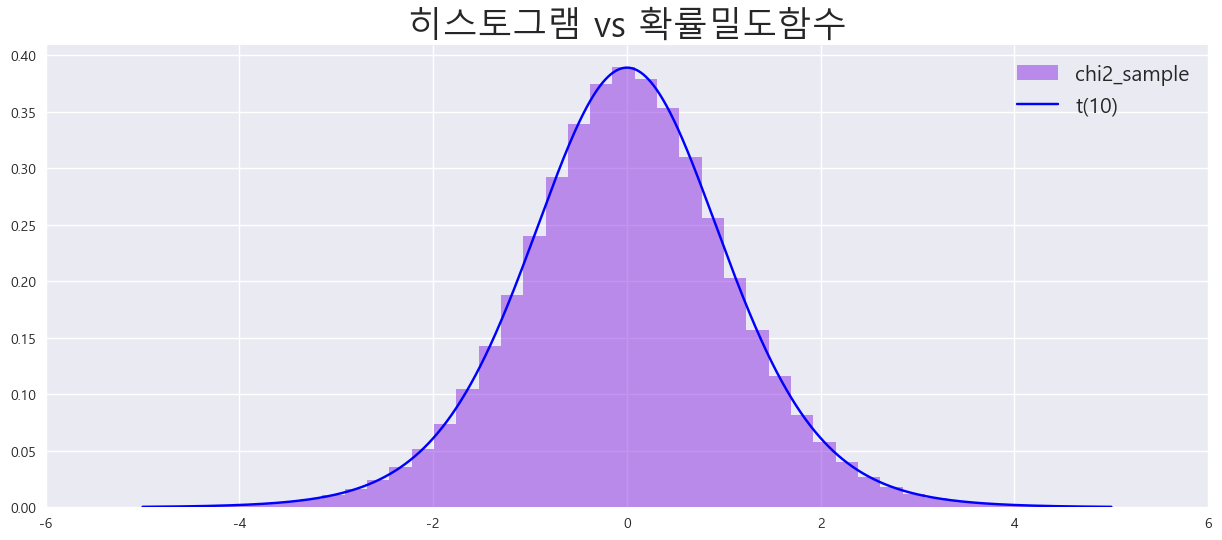

In [154]:
# 표본데이터의 히스토그램과 확률밀도함수

rv = stats.t(n)

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(111)
xs = np.linspace(-5, 5, 10000)
ax1.hist(t_sample, bins = 100, density = True, alpha = 0.5, label = 'chi2_sample', color = 'blueviolet')
ax1.plot(xs, rv.pdf(xs) ,label=f't({n})',color='b')
plt.xlim(-6, 6)
plt.legend(fontsize = 15)
plt.title('히스토그램 vs 확률밀도함수',fontsize=25)

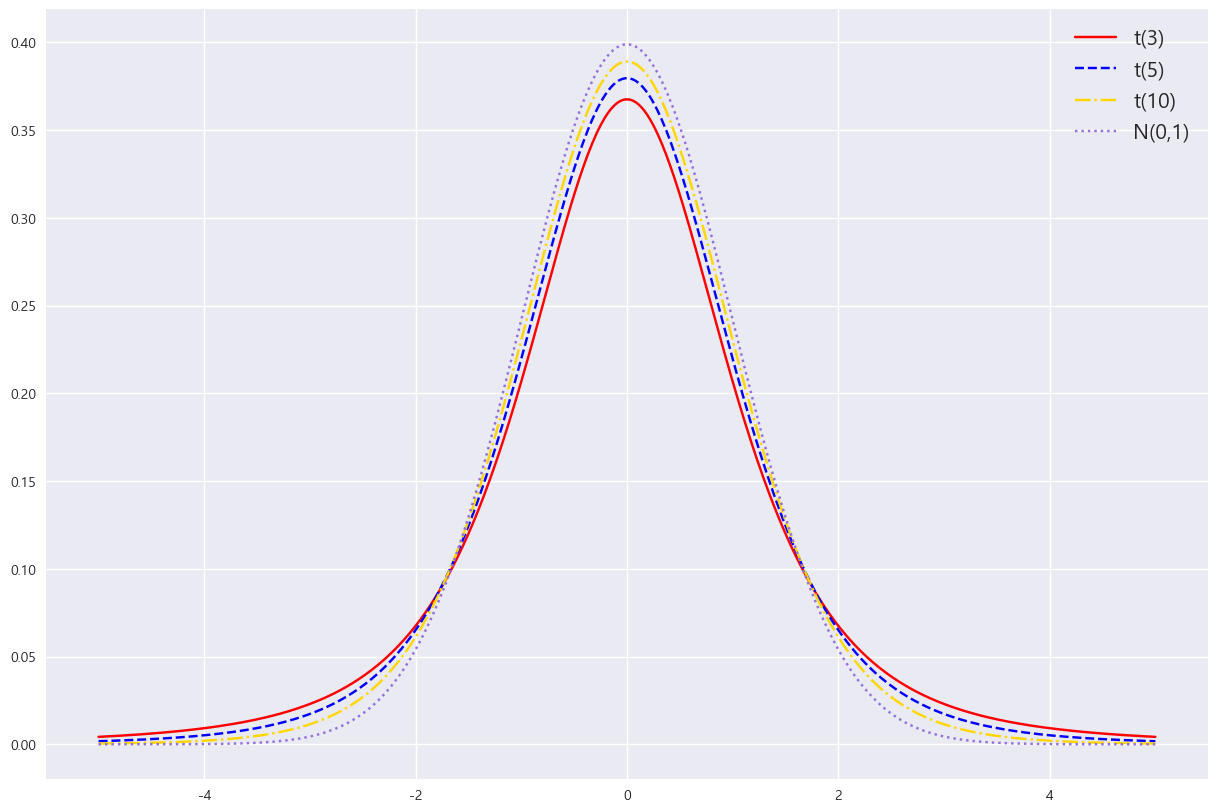

In [155]:
# 자유도 n을 3, 5, 10으로 변환시킬 경우 분포 형태를 시각화하여 비교하세요

plt.figure(figsize = (15 ,10))
xs = np.linspace(-5, 5, 500)
linestyles = ['-', '--', '-.']
colors = ['red', 'blue', 'gold']
for n, ls, cl in zip([3, 5, 10], linestyles, colors):
    rv = stats.t(n)
    plt.plot(xs, rv.pdf(xs), label = f't({n})', ls = ls, color = cl)
plt.plot(xs, stats.norm().pdf(xs),linestyle=':', color='mediumpurple', label='N(0,1)')
plt.legend(fontsize = 15)

In [156]:
# 자유도가 5인 t분포의 상위 5%

stats.t(5).isf(0.05)

2.0150483726691575

### # F 분포
---
- 확률변수 $Y_1, Y_2$ 는 서로 독립이고 각각 $Y_1$ ~ ${\chi}^2(n_1)$, $Y_2$ ~ ${{\chi}^2(n_2)}$를 따를 때, F = ${Y_1 / n_1}\over{Y_2 / n_2}$의 확률분포를 자유도 $n_1, n_2$인 F분포 F$(n_1, n_2)$라고 한다.
- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
- F분포가 취할 수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.
- stats.f(n1, n2) : F 분포 함수 / n1, n2 = 자유도

In [164]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2) # F 분포를 가지는 표본데이터
f_sample

array([2.02480742, 0.78293401, 1.4142305 , ..., 2.86361829, 0.66937099,
       1.54738911])

Text(0.5, 1.0, '히스토그램 vs 확률밀도함수')

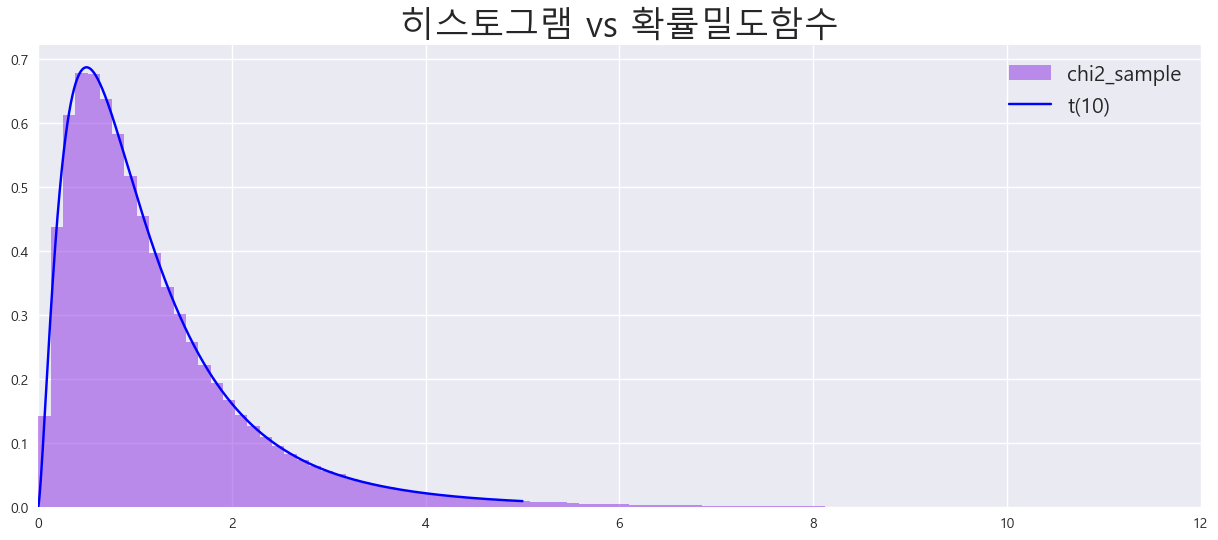

In [165]:
# 표본데이터의 히스토그램과 밀도함수

rv = stats.f(n1, n2)

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(111)
xs = np.linspace(0, 5, 10000)
ax1.hist(f_sample, bins = 500, density = True, alpha = 0.5, label = 'chi2_sample', color = 'blueviolet')
ax1.plot(xs, rv.pdf(xs) ,label=f't({n})',color='b')
plt.xlim(0, 12)
plt.legend(fontsize = 15)
plt.title('히스토그램 vs 확률밀도함수',fontsize=25)

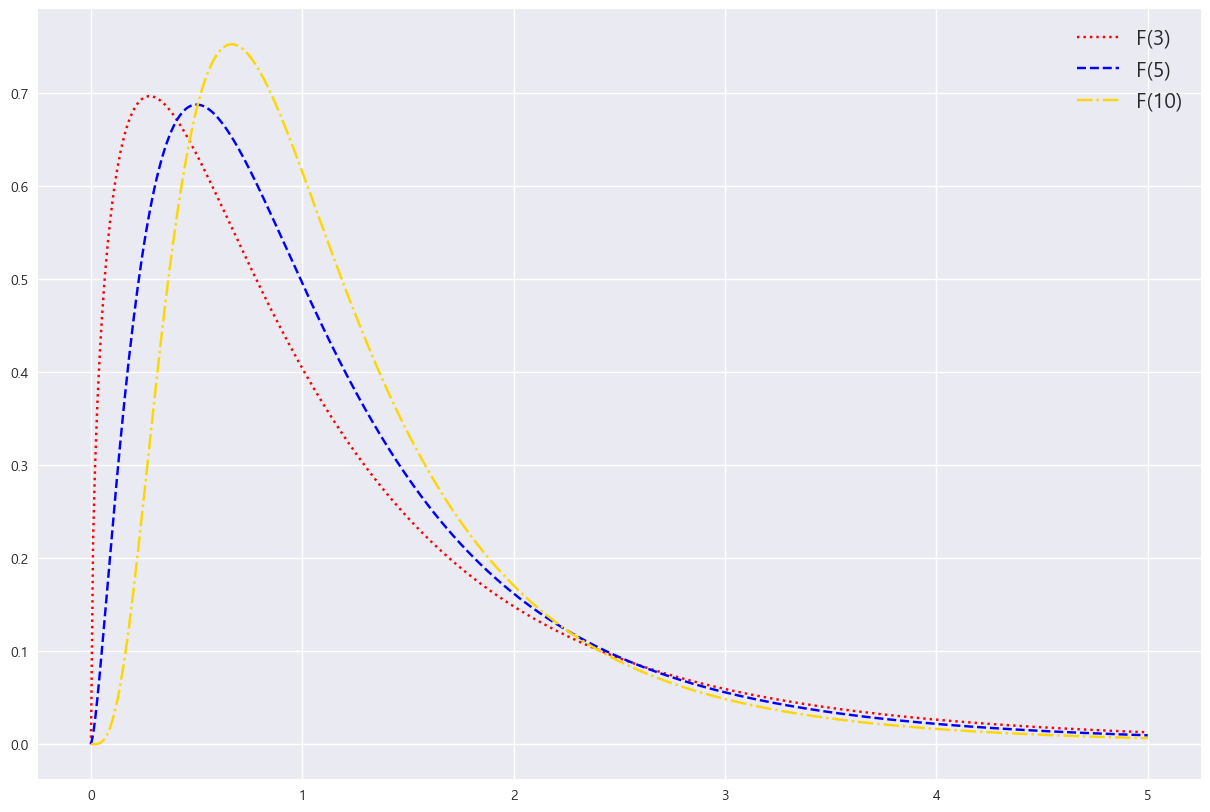

In [167]:
# n2를 10으로 고정하고 n1을 3, 5, 10으로 변화시킬 때 분포 형태를 시각화

plt.figure(figsize = (15 ,10))
xs = np.linspace(0, 5, 500)
linestyles = [':', '--', '-.']
colors = ['red', 'blue', 'gold']
for n1, ls, cl in zip([3, 5, 10], linestyles, colors):
    rv = rv = stats.f(n1, n2)
    plt.plot(xs, rv.pdf(xs), label = f'F({n1})', ls = ls, color = cl)

plt.legend(fontsize = 15)

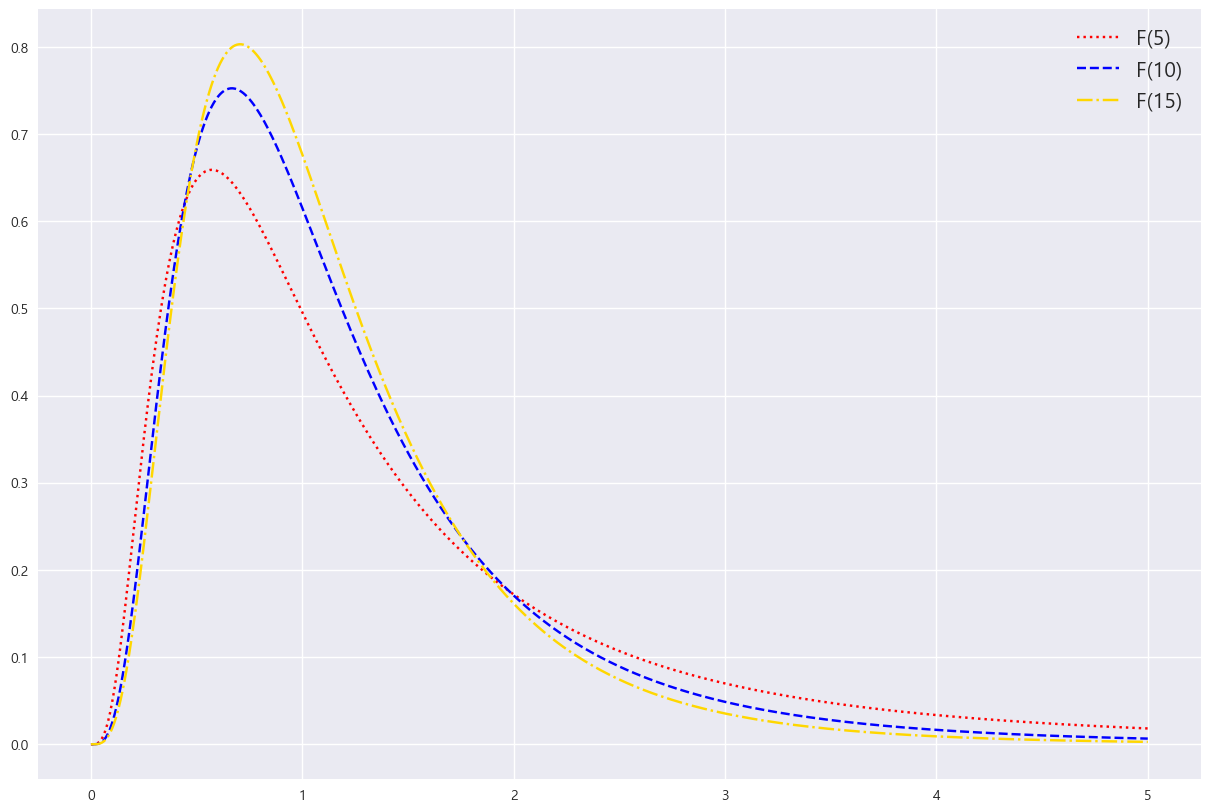

In [170]:
# n1을 5로 고정하고 n2를 5, 10, 15로 변화시킬 때 분포 형태를 시각화

plt.figure(figsize = (15 ,10))
xs = np.linspace(0, 5, 500)
linestyles = [':', '--', '-.']
colors = ['red', 'blue', 'gold']
for n2, ls, cl in zip([5, 10, 15], linestyles, colors):
    rv = rv = stats.f(n1, n2)
    plt.plot(xs, rv.pdf(xs), label = f'F({n2})', ls = ls, color = cl)

plt.legend(fontsize = 15)

## # 문제
---

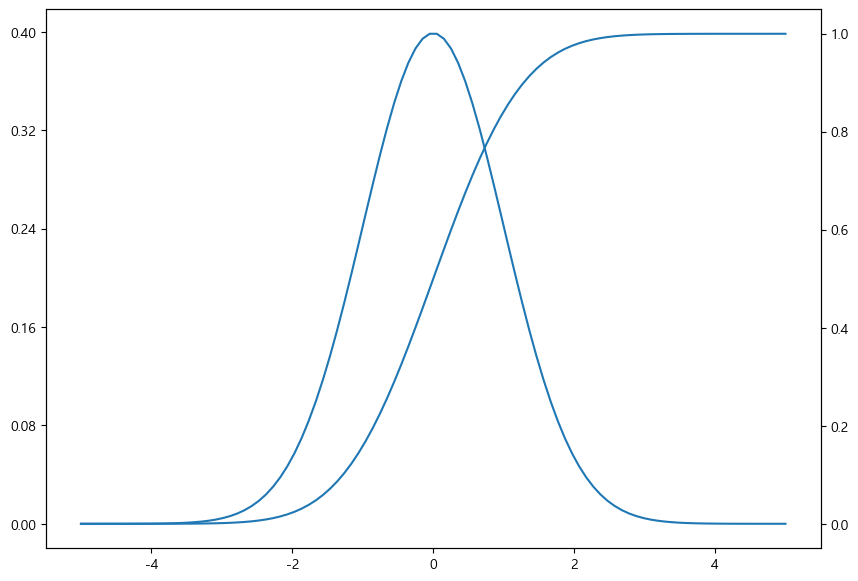

In [80]:
# 확률밀도함수와 누적분포함수를 하나의 그래프로 시각화하여 비교하세요

rv = stats.norm(0, 1)

x = np.linspace(-5, 5, 100)
pdf = rv.pdf(x)
cdf = rv.cdf(x)

fig = plt.figure(figsize = (10, 7))
ax1 = fig.add_subplot(111)
ax1.plot(x, pdf)
y = np.linspace(0, 0.4, 6)
ax1.set_yticks(y)

ax2 = ax1.twinx()
ax2.plot(x, cdf)

0.5

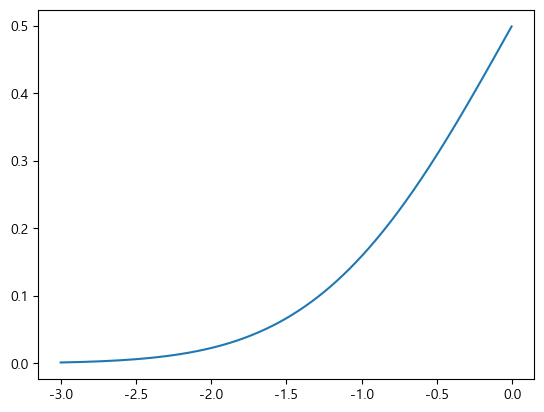

In [81]:
# 0까지 누적분포

rv = stats.norm(0, 1)
x = np.linspace(-3, 3, 1000)
a = x[x <= 0]

plt.plot(a, rv.cdf(a))
rv.cdf(0)

In [82]:
# 누적분포가 0.5인 x값

rv = stats.norm(0, 1)
rv.ppf(0.5)

0.0

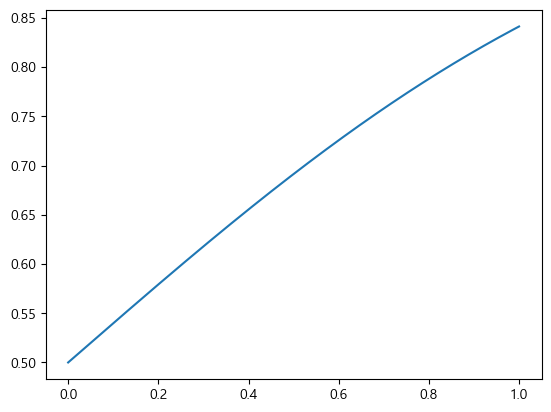

In [83]:
# 0 ~ 1까지 누적확률분포

rv = stats.norm(0, 1)
x = np.linspace(0, 1, 1000)

plt.plot(x, rv.cdf(x))

In [84]:
# (-2 < x < 2) 확률

rv = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
rv.cdf(2) - rv.cdf(-2)

0.9544997361036416

In [85]:
# 상위 5% 확률의 퍼센트 포인트
# 하위 5% 확률의 퍼센트 포인트

rv.isf(0.05), rv.isf(0.95) # 상위 5%, 하위 5%
# rv.ppf(0.95), rv.ppf(0.05) # 위와 동일

(1.6448536269514729, -1.6448536269514722)

In [86]:
# 하위 5% 상위 5% 확률의 퍼센트 포인트

rv.interval(0.9)

(-1.6448536269514729, 1.6448536269514722)

In [87]:
# 어느 회사에서 종업원들의 근무시간을 조사하였는데 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오

stats.norm(11, 4).sf(14)

0.2266273523768682

In [88]:
# 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760이하일 확률을 구하세요.

stats.norm(800, 30).cdf(760)

0.09121121972586788

In [7]:
# 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 점수가 80점 이상이고 90점 이하일 확률을 구하세요

rv = stats.norm(70, np.sqrt(64))
rv.cdf(90) - rv.cdf(80)

0.09944010834107919

## # 참고
---
- https://m.blog.naver.com/parksehoon1971/221585254692